In [2]:

# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

<ipython-input-2-da380ff32ba9>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [3]:
start_date = '2015-01-01'
start_date

'2015-01-01'

In [4]:
# Set start and end dates for the price data
# Establecer fechas de inicio y finalización para los datos de precios

end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
end_date

'2023-07-31'

In [5]:
#!pip install yfinance

In [6]:
import yfinance as yf

In [9]:

# Read the csv file using read_csv
# method of pandas
df = yf.download('BTC', start=start_date, end=end_date)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-01,100.000000,100.000000,100.000000,100.000000,100.000000,0
2020-10-02,100.000000,100.000000,100.000000,100.000000,100.000000,0
2020-10-05,100.029999,100.040001,99.995003,99.995003,99.995003,10725
2020-10-06,100.010002,100.029999,100.010002,100.029999,100.029999,10080
2020-10-07,99.949997,99.959999,99.919998,99.919998,99.919998,6350
...,...,...,...,...,...,...
2023-07-24,91.656303,91.656303,91.417397,91.417397,91.417397,703
2023-07-25,91.329903,91.344704,91.329903,91.344704,91.344704,282
2023-07-26,91.320000,91.470001,91.320000,91.470001,91.470001,370


In [10]:

# Changes The Date column as index columns
# df.index = pd.to_datetime(df['Date'])
# df

# drop The original date column
# df = df.drop(['Date'], axis='columns')
# df

In [11]:

# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2020-10-01,0.000000,0.000000
2020-10-02,0.000000,0.000000
2020-10-05,0.034996,0.044998
2020-10-06,-0.019997,0.019997
2020-10-07,0.029999,0.040001


In [12]:

# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,

In [14]:
df['señal_siguiente'] = y

In [16]:
df.head(50)

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,señal_siguiente
Date,,,,,,,,,
2020-10-01,100.000000,100.000000,100.000000,100.000000,100.000000,0,0.000000,0.000000,0
2020-10-02,100.000000,100.000000,100.000000,100.000000,100.000000,0,0.000000,0.000000,0
2020-10-05,100.029999,100.040001,99.995003,99.995003,99.995003,10725,0.034996,0.044998,1
2020-10-06,100.010002,100.029999,100.010002,100.029999,100.029999,10080,-0.019997,0.019997,0
2020-10-07,99.949997,99.959999,99.919998,99.919998,99.919998,6350,0.029999,0.040001,1
2020-10-08,99.989998,99.995003,99.971703,99.995003,99.995003,650,-0.005005,0.023300,0
2020-10-09,99.970001,99.980003,99.940002,99.940002,99.940002,1820,0.029999,0.040001,0
2020-10-12,99.959999,99.970001,99.940002,99.940002,99.940002,5685,0.019997,0.029999,1
2020-10-13,99.978996,99.989998,99.963203,99.964996,99.964996,3635,0.014000,0.026794,1


In [ ]:

split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]

In [ ]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [ ]:

df['Predicted_Signal'] = cls.predict(X)
df['Predicted_Signal']

Date
2020-10-01    0
2020-10-02    0
2020-10-05    0
2020-10-06    0
2020-10-07    0
             ..
2023-07-17    0
2023-07-18    0
2023-07-19    0
2023-07-20    0
2023-07-21    0
Name: Predicted_Signal, Length: 705, dtype: int64

In [1]:
# Calculate daily returns
df['Return'] = df.Close.pct_change()
df['Return']

NameError: ignored

In [ ]:

# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)
df['Strategy_Return']

Date
2020-10-01    NaN
2020-10-02    0.0
2020-10-05   -0.0
2020-10-06    0.0
2020-10-07   -0.0
             ... 
2023-07-17   -0.0
2023-07-18    0.0
2023-07-19    0.0
2023-07-20   -0.0
2023-07-21    0.0
Name: Strategy_Return, Length: 705, dtype: float64

In [ ]:
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2020-10-01,100.000000,100.000000,100.000000,100.000000,100.000000,0,0.000000,0.000000,0,NaN,NaN,NaN
2020-10-02,100.000000,100.000000,100.000000,100.000000,100.000000,0,0.000000,0.000000,0,0.000000,0.0,0.000000
2020-10-05,100.029999,100.040001,99.995003,99.995003,99.995003,10725,0.034996,0.044998,0,-0.000050,-0.0,-0.000050
2020-10-06,100.010002,100.029999,100.010002,100.029999,100.029999,10080,-0.019997,0.019997,0,0.000350,0.0,0.000300
2020-10-07,99.949997,99.959999,99.919998,99.919998,99.919998,6350,0.029999,0.040001,0,-0.001100,-0.0,-0.000800
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-17,91.580002,91.654099,91.580002,91.654099,91.654099,24002,-0.074097,0.074097,0,-0.000686,-0.0,-0.085302
2023-07-18,91.869904,91.869904,91.695297,91.695297,91.695297,1602,0.174606,0.174606,0,0.000450,0.0,-0.084853
2023-07-19,91.830002,91.835999,91.830002,91.834000,91.834000,241,-0.003998,0.005997,0,0.001513,0.0,-0.083340


In [ ]:
# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2020-10-01,100.000000,100.000000,100.000000,100.000000,100.000000,0,0.000000,0.000000,0,NaN,NaN,NaN,NaN
2020-10-02,100.000000,100.000000,100.000000,100.000000,100.000000,0,0.000000,0.000000,0,0.000000,0.0,0.000000,0.000000
2020-10-05,100.029999,100.040001,99.995003,99.995003,99.995003,10725,0.034996,0.044998,0,-0.000050,-0.0,-0.000050,0.000000
2020-10-06,100.010002,100.029999,100.010002,100.029999,100.029999,10080,-0.019997,0.019997,0,0.000350,0.0,0.000300,0.000000
2020-10-07,99.949997,99.959999,99.919998,99.919998,99.919998,6350,0.029999,0.040001,0,-0.001100,-0.0,-0.000800,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-17,91.580002,91.654099,91.580002,91.654099,91.654099,24002,-0.074097,0.074097,0,-0.000686,-0.0,-0.085302,-0.006306
2023-07-18,91.869904,91.869904,91.695297,91.695297,91.695297,1602,0.174606,0.174606,0,0.000450,0.0,-0.084853,-0.006306
2023-07-19,91.830002,91.835999,91.830002,91.834000,91.834000,241,-0.003998,0.005997,0,0.001513,0.0,-0.083340,-0.006306


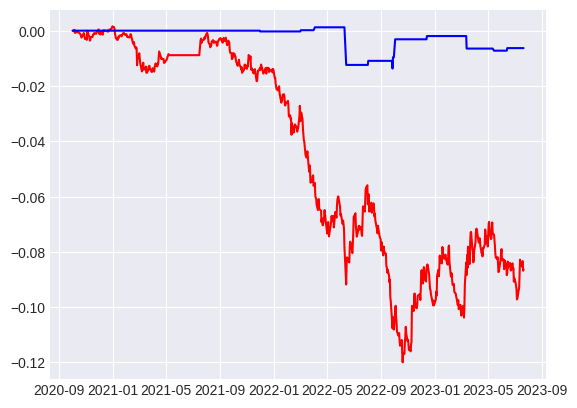

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')